# Projet 1 : Covid-19

# Exploratory Data Analysis

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

/Users/Maxime/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/Maxime/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [12]:
data = pd.read_excel('/Users/Maxime/MACHINE LEARNIA YOUTUBE/Datas/dataset_covid19.xlsx')
df = data.copy()

# Analyse de la Forme:

-**Variable Target:** SARS-Cov-2 exam result

-**Lignes/Colonnes:** (5644, 111)

-**Type de variables:** float64: 70 / object:37 / int64:4

**Analyse des valeurs manquantes:**
* Beaucoup de NaN (moitié des variables >90% de NaN)
* 2 groupes de données 76% -> Test viral, 89% taux sanguins

# Analyse de Fond:

-**Visualisation de la target:** negative 0.90 positive 0.0988

-**Signification des variables:** Variables continues standardisées, skewed, difficile d'interprêter les données (sans doutes déjà traitées).

Variables qualitatives binaires, Rhinovius semble très élevé

**Relation Variables/Target:** 

* target / blood: Il semblerait que les taux de Monocytes, platelets, Leukocytes semblent liés au covid 19 -> hypothèse à tester
* target / age: Difficile à interprêter
* target / viral: les doubles maladies sont très rares. Rhinovirus/Enterovirus ?


# Analyse détaillée:

* **Relation Variables / Variables:**
  * blood_data / blood_data : variables fortement corrélées
  * Age / blood_data: Corrélation très faible entre l'age et les taux sanguins
  * Viral / Viral : Influenza rapid testdonne de mauvais résultats selon internet, il faudra peut-être la laisser tomber
  * Relation Maladie sur certains virus / Taux sanguins : taux sanguins entre malades du covid 19 et d'autres virus sont différents
  * Relation hospitalisation / est malade :
  * Relation hospitalisation / blood : taux de leukocyte particulièrement élevé pour les patients en soin intensif. Peut être intéressant si on essaie d'orienter les patients vers le bon service

* **NA Analyse:** 
  * viral -> drop na = 92%/8%
  * blood -> drop na = 86%/14%
  
* **Tests d'hypothèses nulles H0:**
  * Les individus atteints de covid19 ont des taux de Leukocytes, Monocytes, Platelets significativement différents
    * H0: Les taux moyens sont égaux chez les individus positifs et négatifs :**rejeté pour les platelets, leukocytes, Eosinophils et Monocytes avec un Alpha de 1%**
  * Les individus atteints d'une quelconque maladie ont des taux significativement différents
    * H0: Les taux moyens sont égaux chez les malades quelque soit la maladie 

## Exporatory Data Analysis

## Analyse de la forme

In [4]:
pd.set_option('display.max_column',111)
df.shape
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

float64    70
object     37
int64       4
dtype: int64

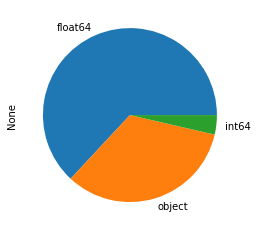

In [5]:
pd.set_option('display.max_row',111)
df.dtypes.value_counts().plot.pie() #Types de variables
df.dtypes.value_counts()

Analyse des valeurs manquantes en visualisant le dataset dans son ensemble avec seaborn

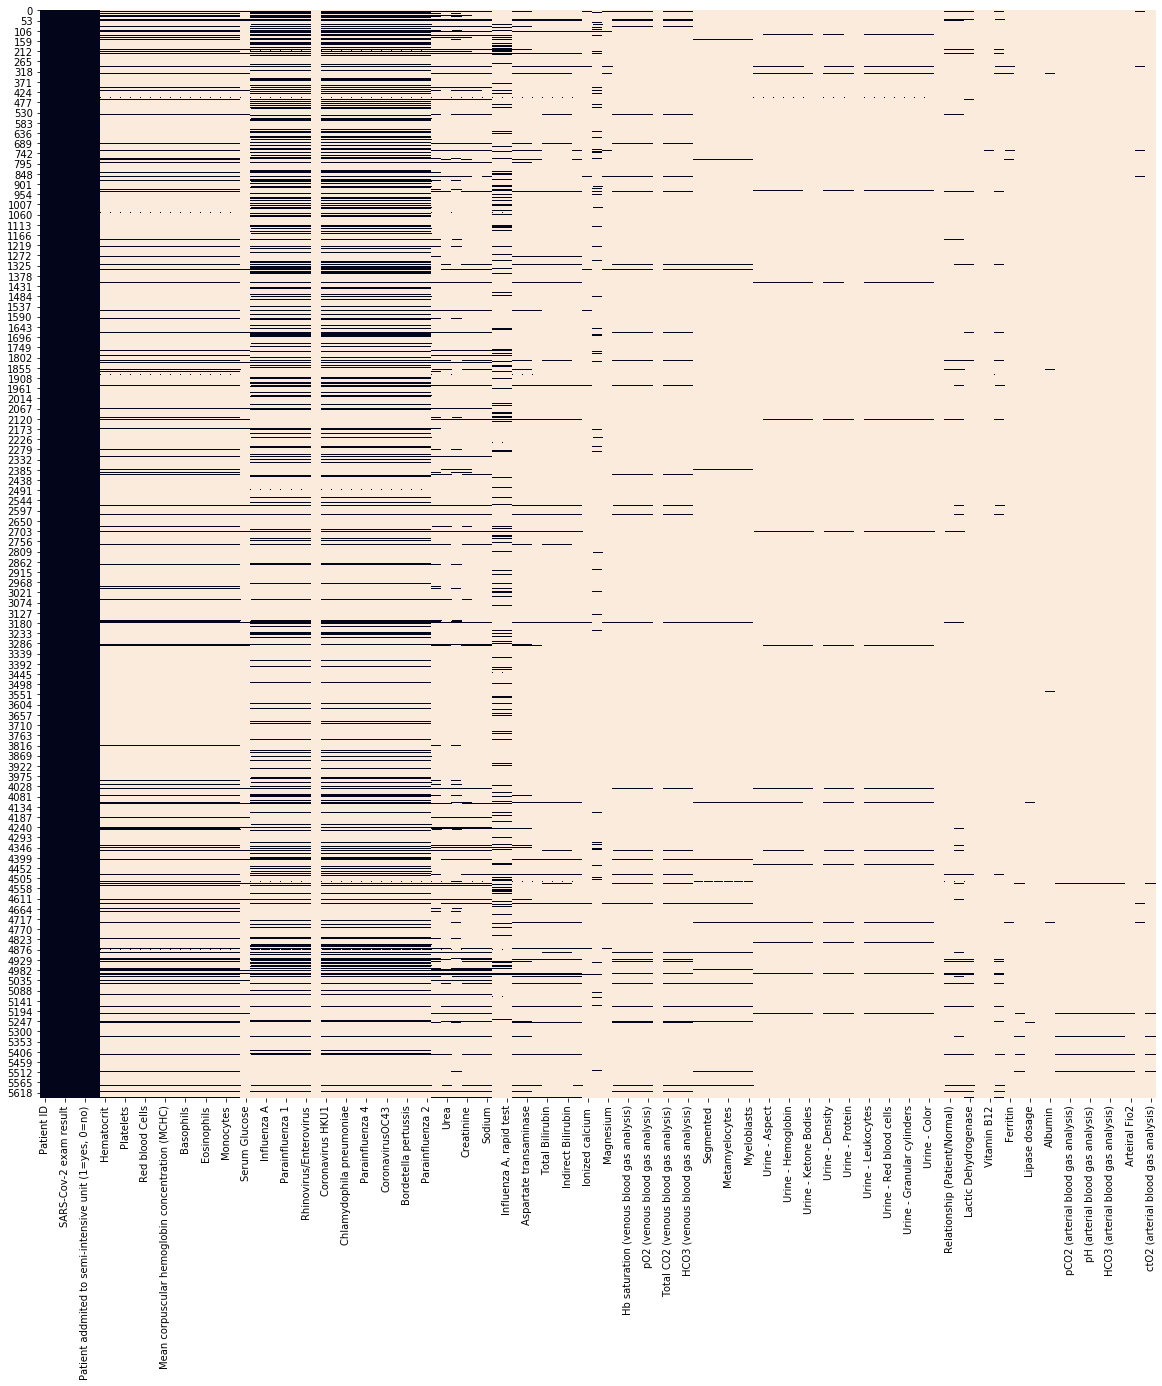

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isna(), cbar=False)

In [36]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)
#Avec +90% de valeurs manquantes, c'est compliqué de faire quelquechose,
#on peut supprimer d'office

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

## Analyse du fond

In [6]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
df.drop('Patient ID', axis=1, inplace=True)
df.shape #on a éliminé les colonnes avec - de 90% de datas

(5644, 38)

In [7]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [46]:
#Examen de la colonne target
df['SARS-Cov-2 exam result'].value_counts() #Cas positives et négatives
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

Hematocrit
Hemoglobin
Platelets
Mean platelet volume 
Red blood Cells
Lymphocytes
Mean corpuscular hemoglobin concentration (MCHC)
Leukocytes
Basophils
Mean corpuscular hemoglobin (MCH)
Eosinophils
Mean corpuscular volume (MCV)
Monocytes
Red blood cell distribution width (RDW)


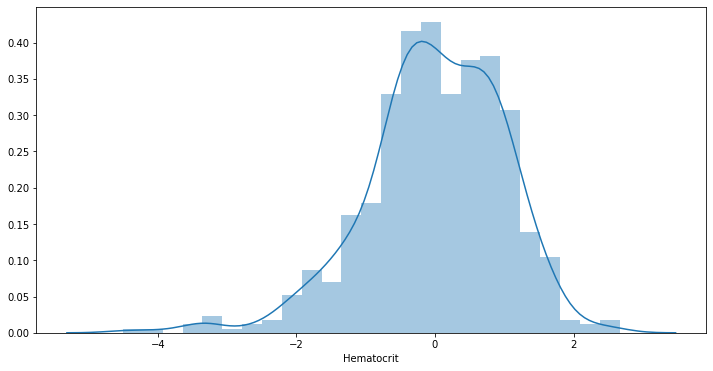

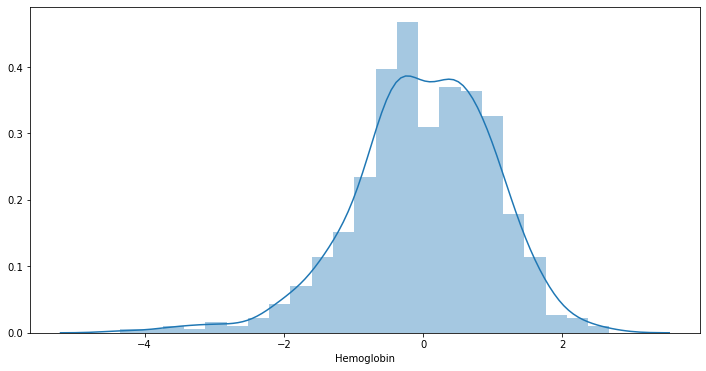

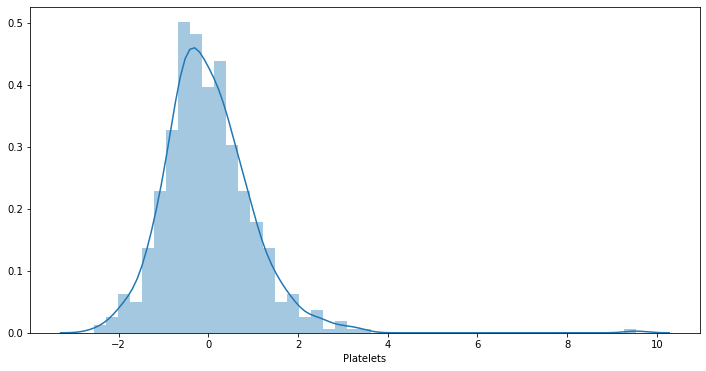

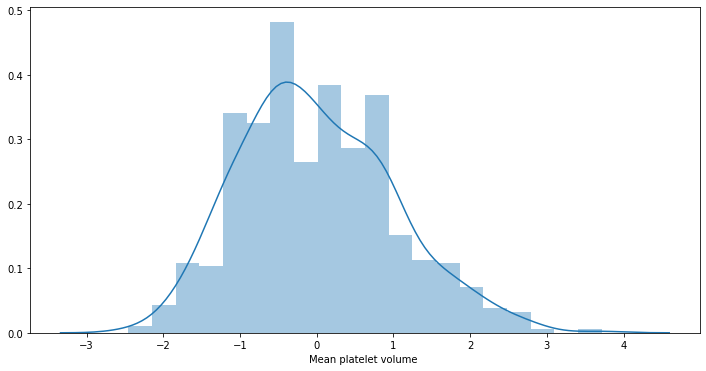

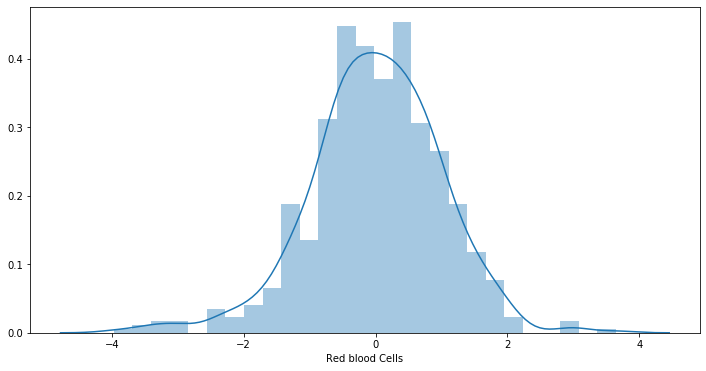

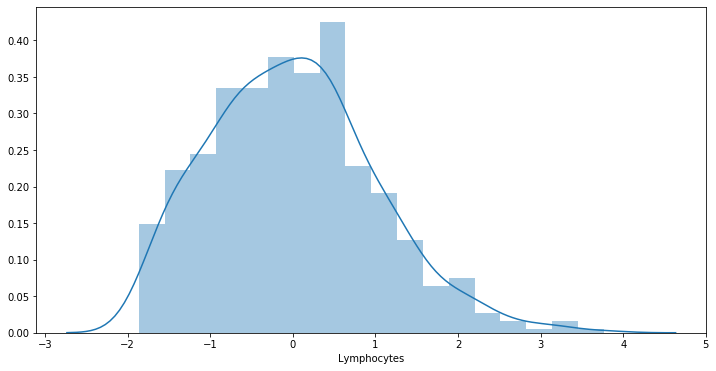

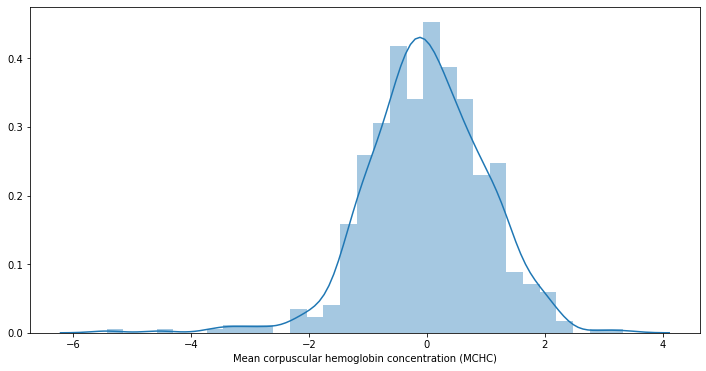

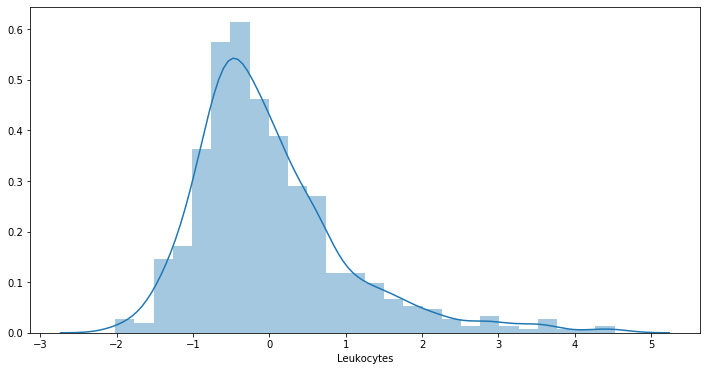

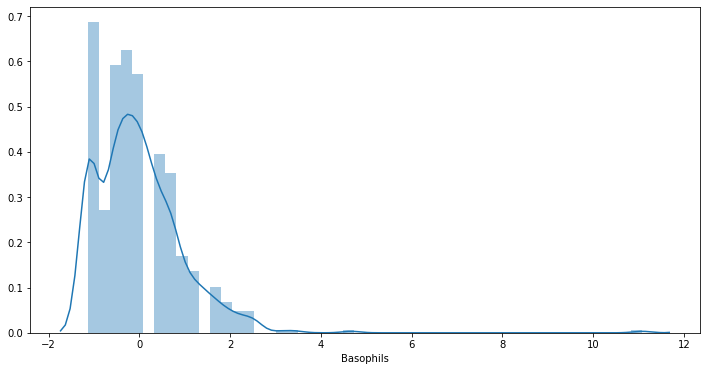

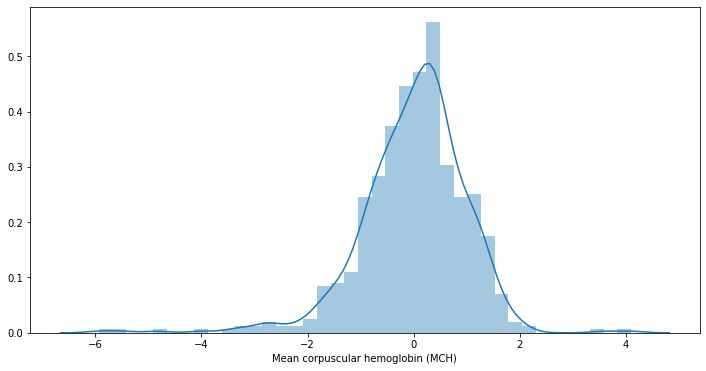

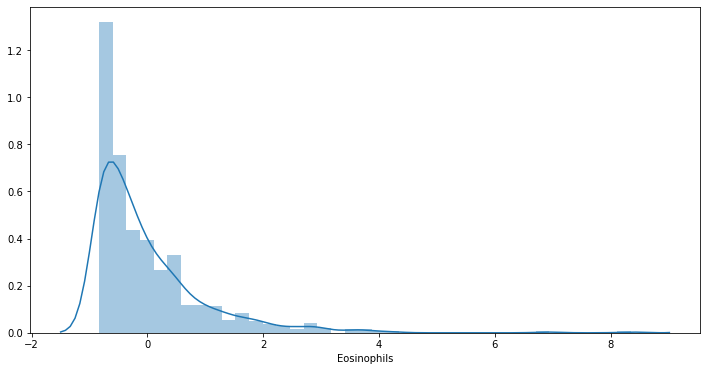

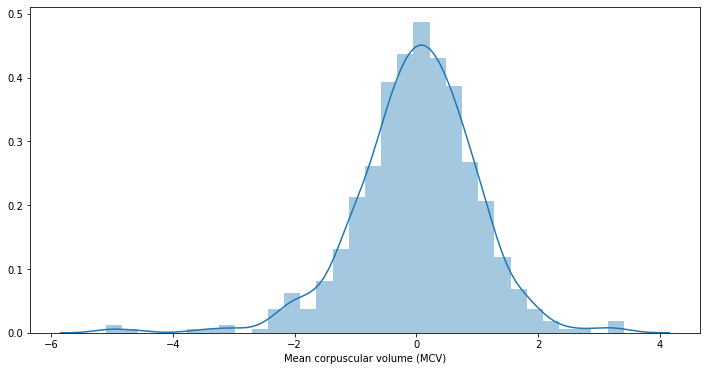

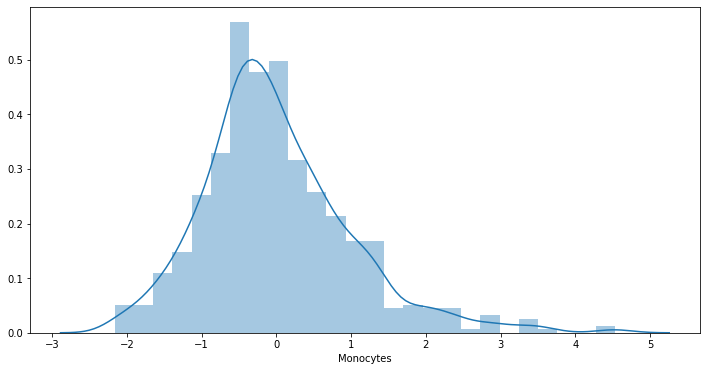

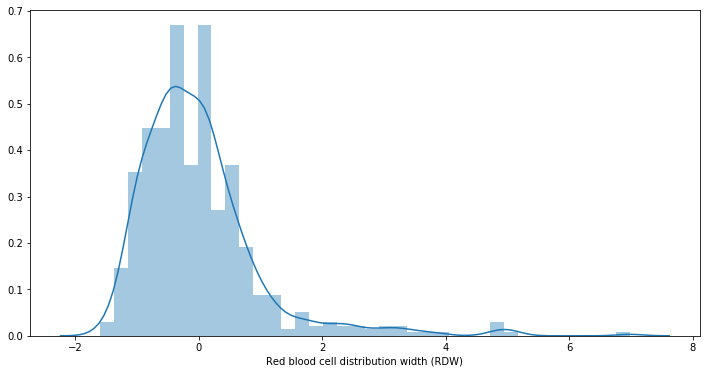

In [49]:
#Histogrames des variables continues
#On remarque qu'elles ont été normalisées
for col in df.select_dtypes('float'):
    print(col)
    plt.figure(figsize=(12,6))
    #plt.hist(df[col], bins=50)
    sns.distplot(df[col])

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

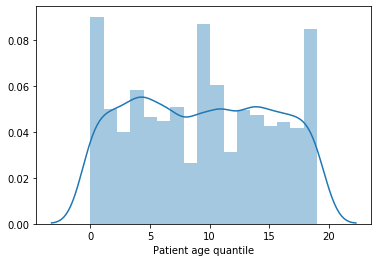

In [54]:
sns.distplot(df['Patient age quantile'])
df['Patient age quantile'].value_counts()

In [61]:
#Variable Qualitatives
for col in df.select_dtypes('object'):
    print(f'{col :<30}{df[col].unique()}') #Système de marge

SARS-Cov-2 exam result        ['negative' 'positive']
Respiratory Syncytial Virus   [nan 'not_detected' 'detected']
Influenza A                   [nan 'not_detected' 'detected']
Influenza B                   [nan 'not_detected' 'detected']
Parainfluenza 1               [nan 'not_detected' 'detected']
CoronavirusNL63               [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus        [nan 'detected' 'not_detected']
Coronavirus HKU1              [nan 'not_detected' 'detected']
Parainfluenza 3               [nan 'not_detected' 'detected']
Chlamydophila pneumoniae      [nan 'not_detected' 'detected']
Adenovirus                    [nan 'not_detected' 'detected']
Parainfluenza 4               [nan 'not_detected' 'detected']
Coronavirus229E               [nan 'not_detected' 'detected']
CoronavirusOC43               [nan 'not_detected' 'detected']
Inf A H1N1 2009               [nan 'not_detected' 'detected']
Bordetella pertussis          [nan 'not_detected' 'detected']
Metapneumovirus 

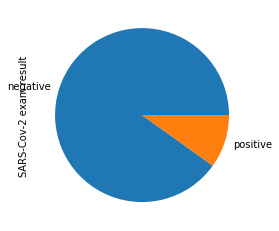

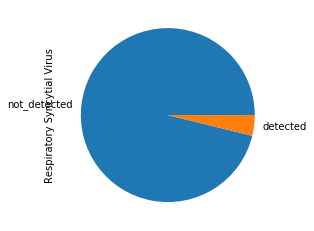

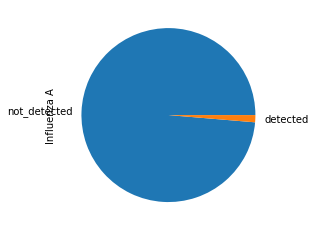

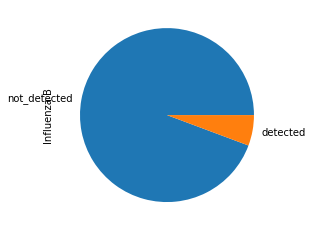

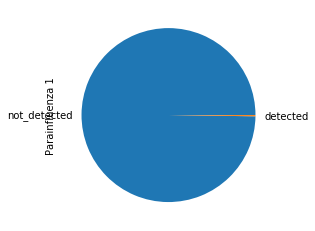

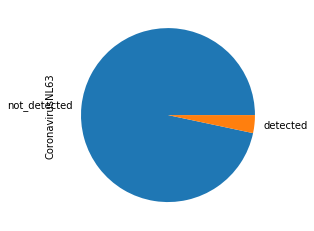

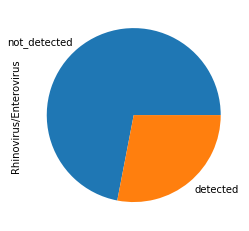

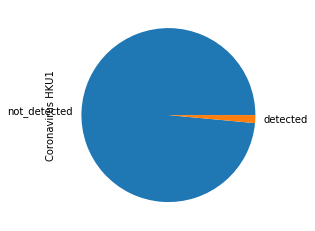

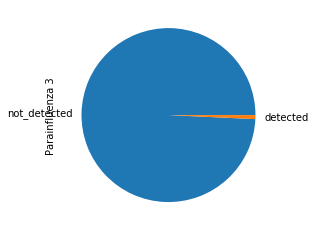

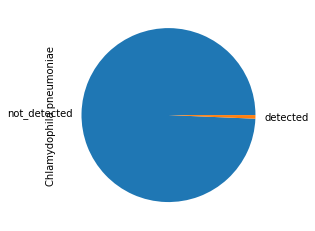

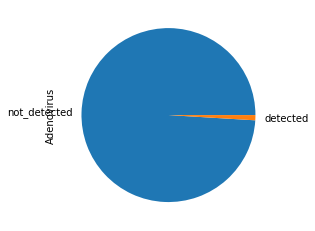

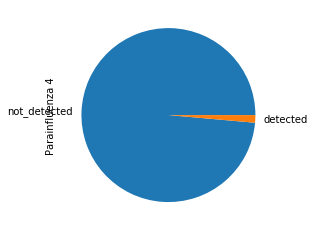

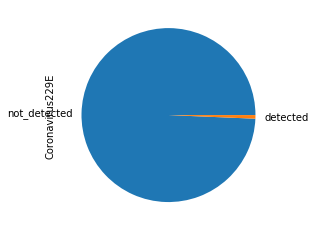

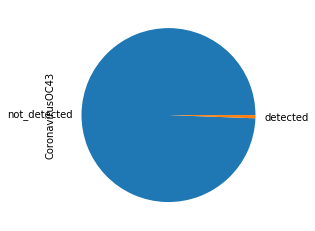

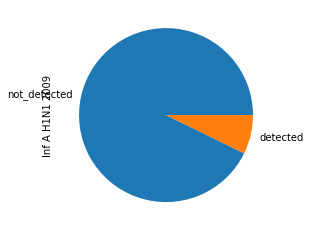

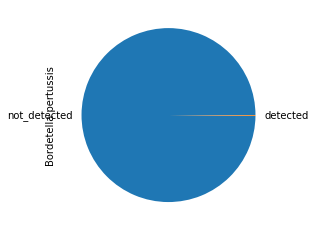

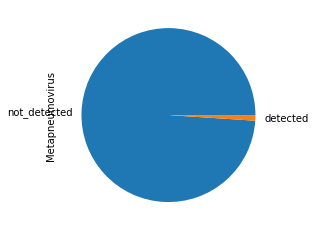

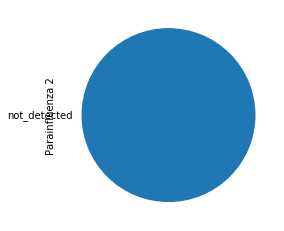

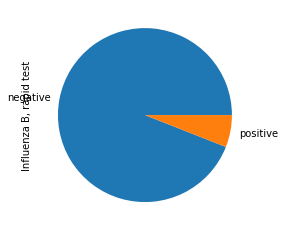

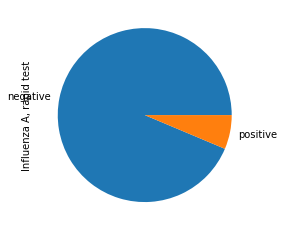

In [63]:
#Variable Qualitatives
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

In [64]:
#Visualiser la relation Variable Target

## Relation Target/Variables

### Création de sous-ensembles positifs et négatifs

In [8]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']

negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

### Création de sous-ensembles Blood et viral

In [9]:
missing_rate = df.isna().sum()/df.shape[0]
blood_columns = df.columns[(missing_rate<0.9)&(missing_rate>0.88)] #on a identifié cela précédemment
viral_columns = df.columns[(missing_rate<0.88)] #les autres
viral_columns = viral_columns.drop('Patient age quantile')

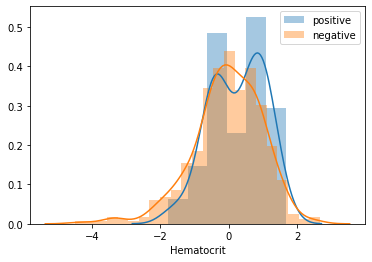

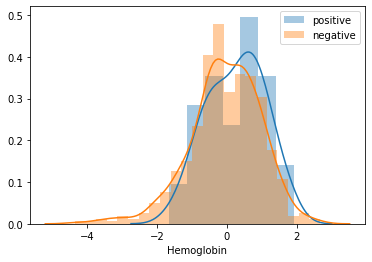

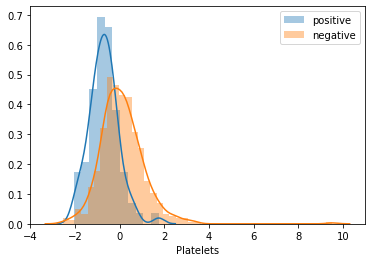

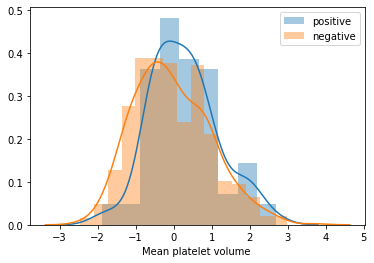

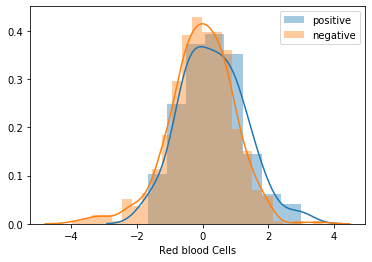

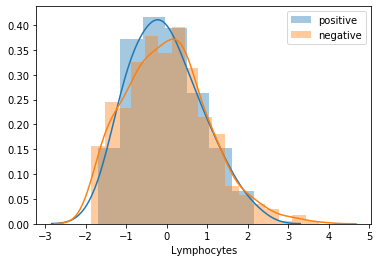

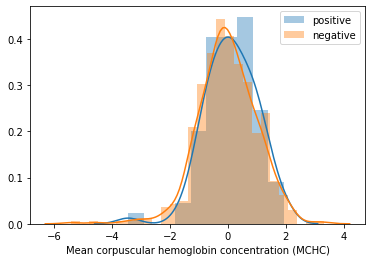

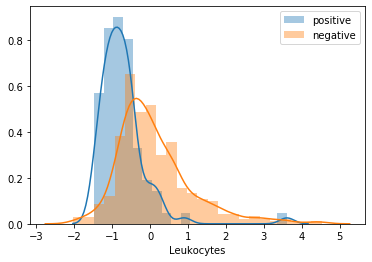

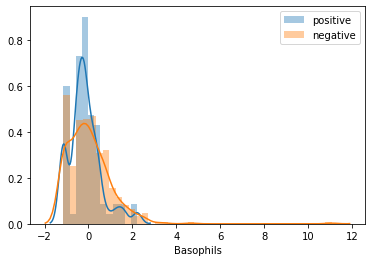

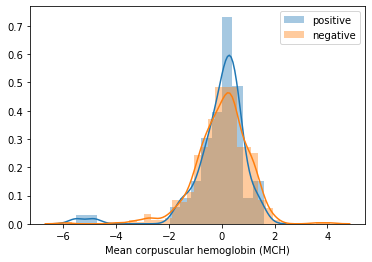

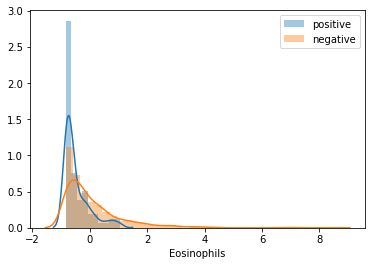

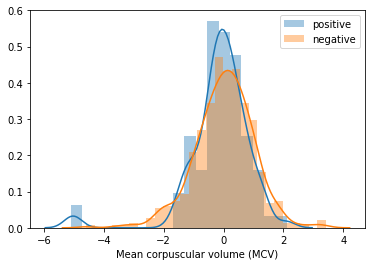

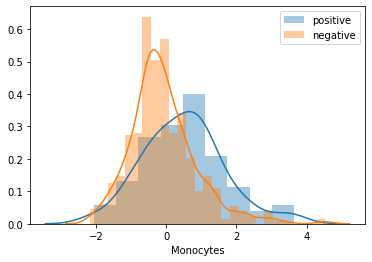

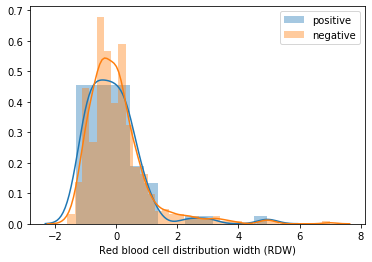

In [12]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

### Relation Target/age

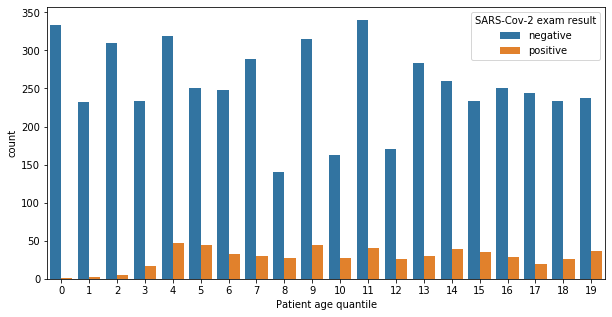

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

### Relation Target/Viral

On utilise une crosstab quand on veut analyser une relation entre variables catégorielles

In [14]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

/Users/Maxime/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


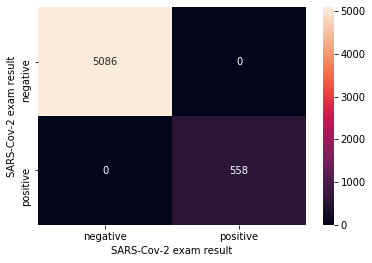

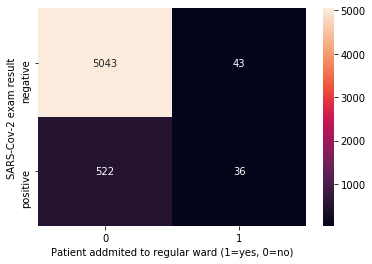

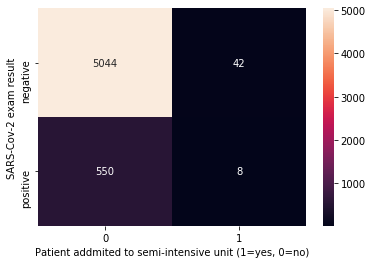

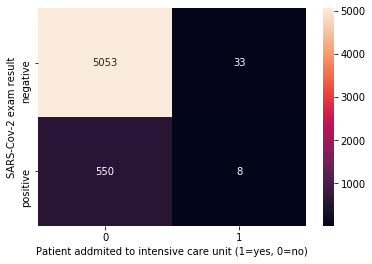

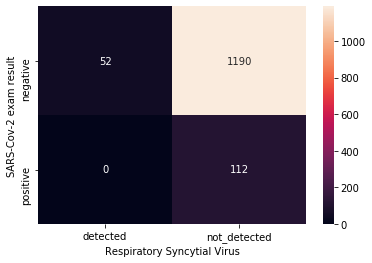

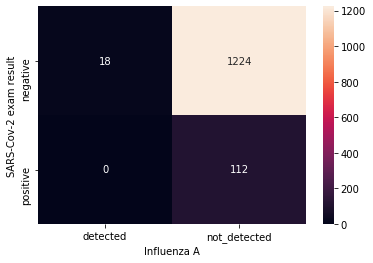

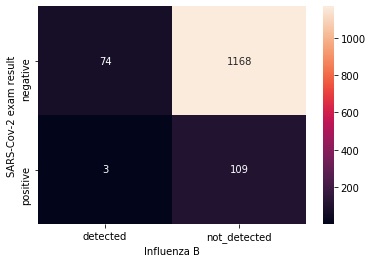

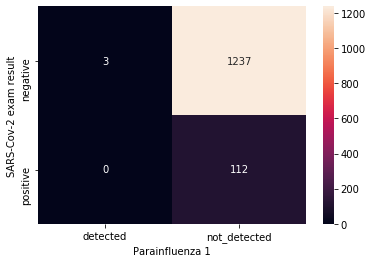

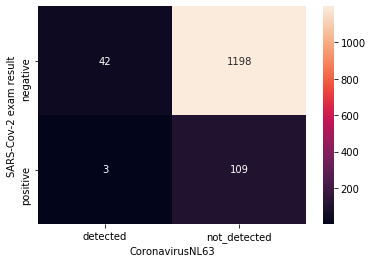

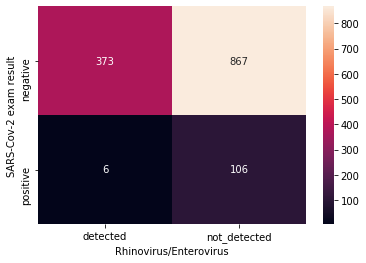

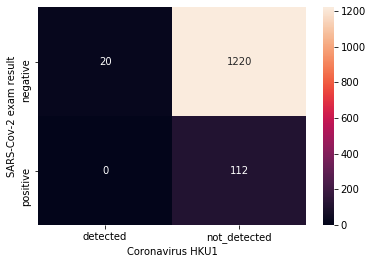

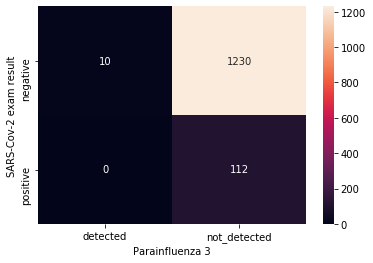

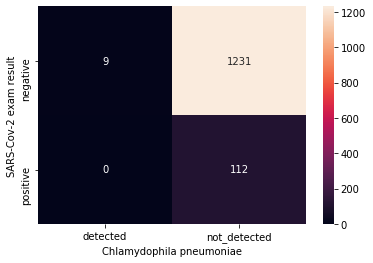

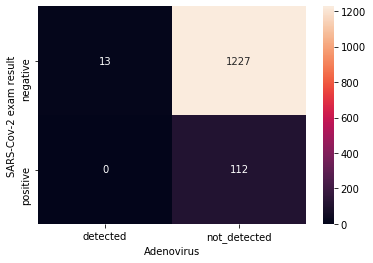

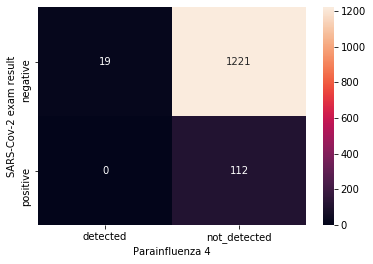

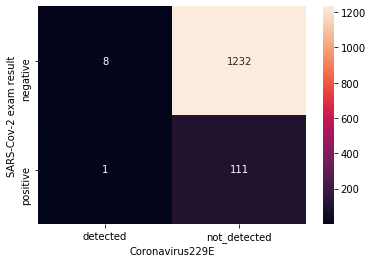

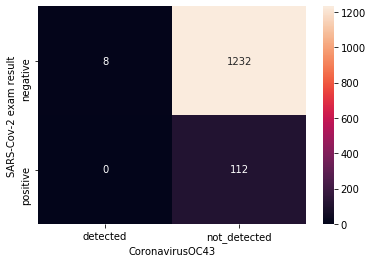

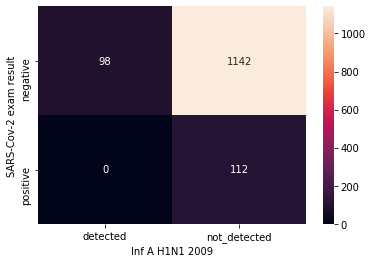

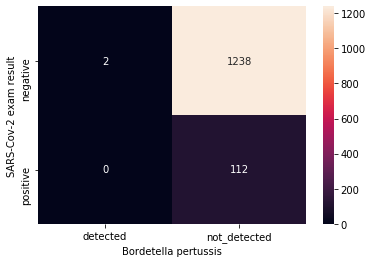

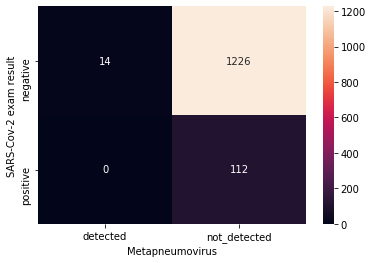

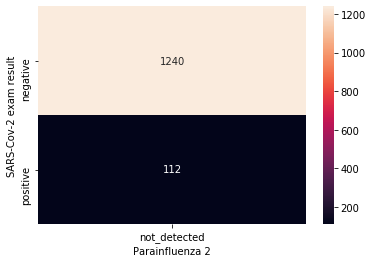

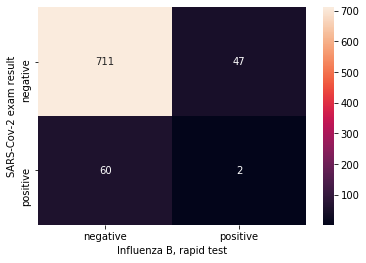

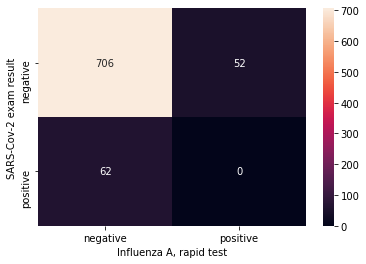

In [15]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

## Analyse détaillée

## Relation Variables / Variables

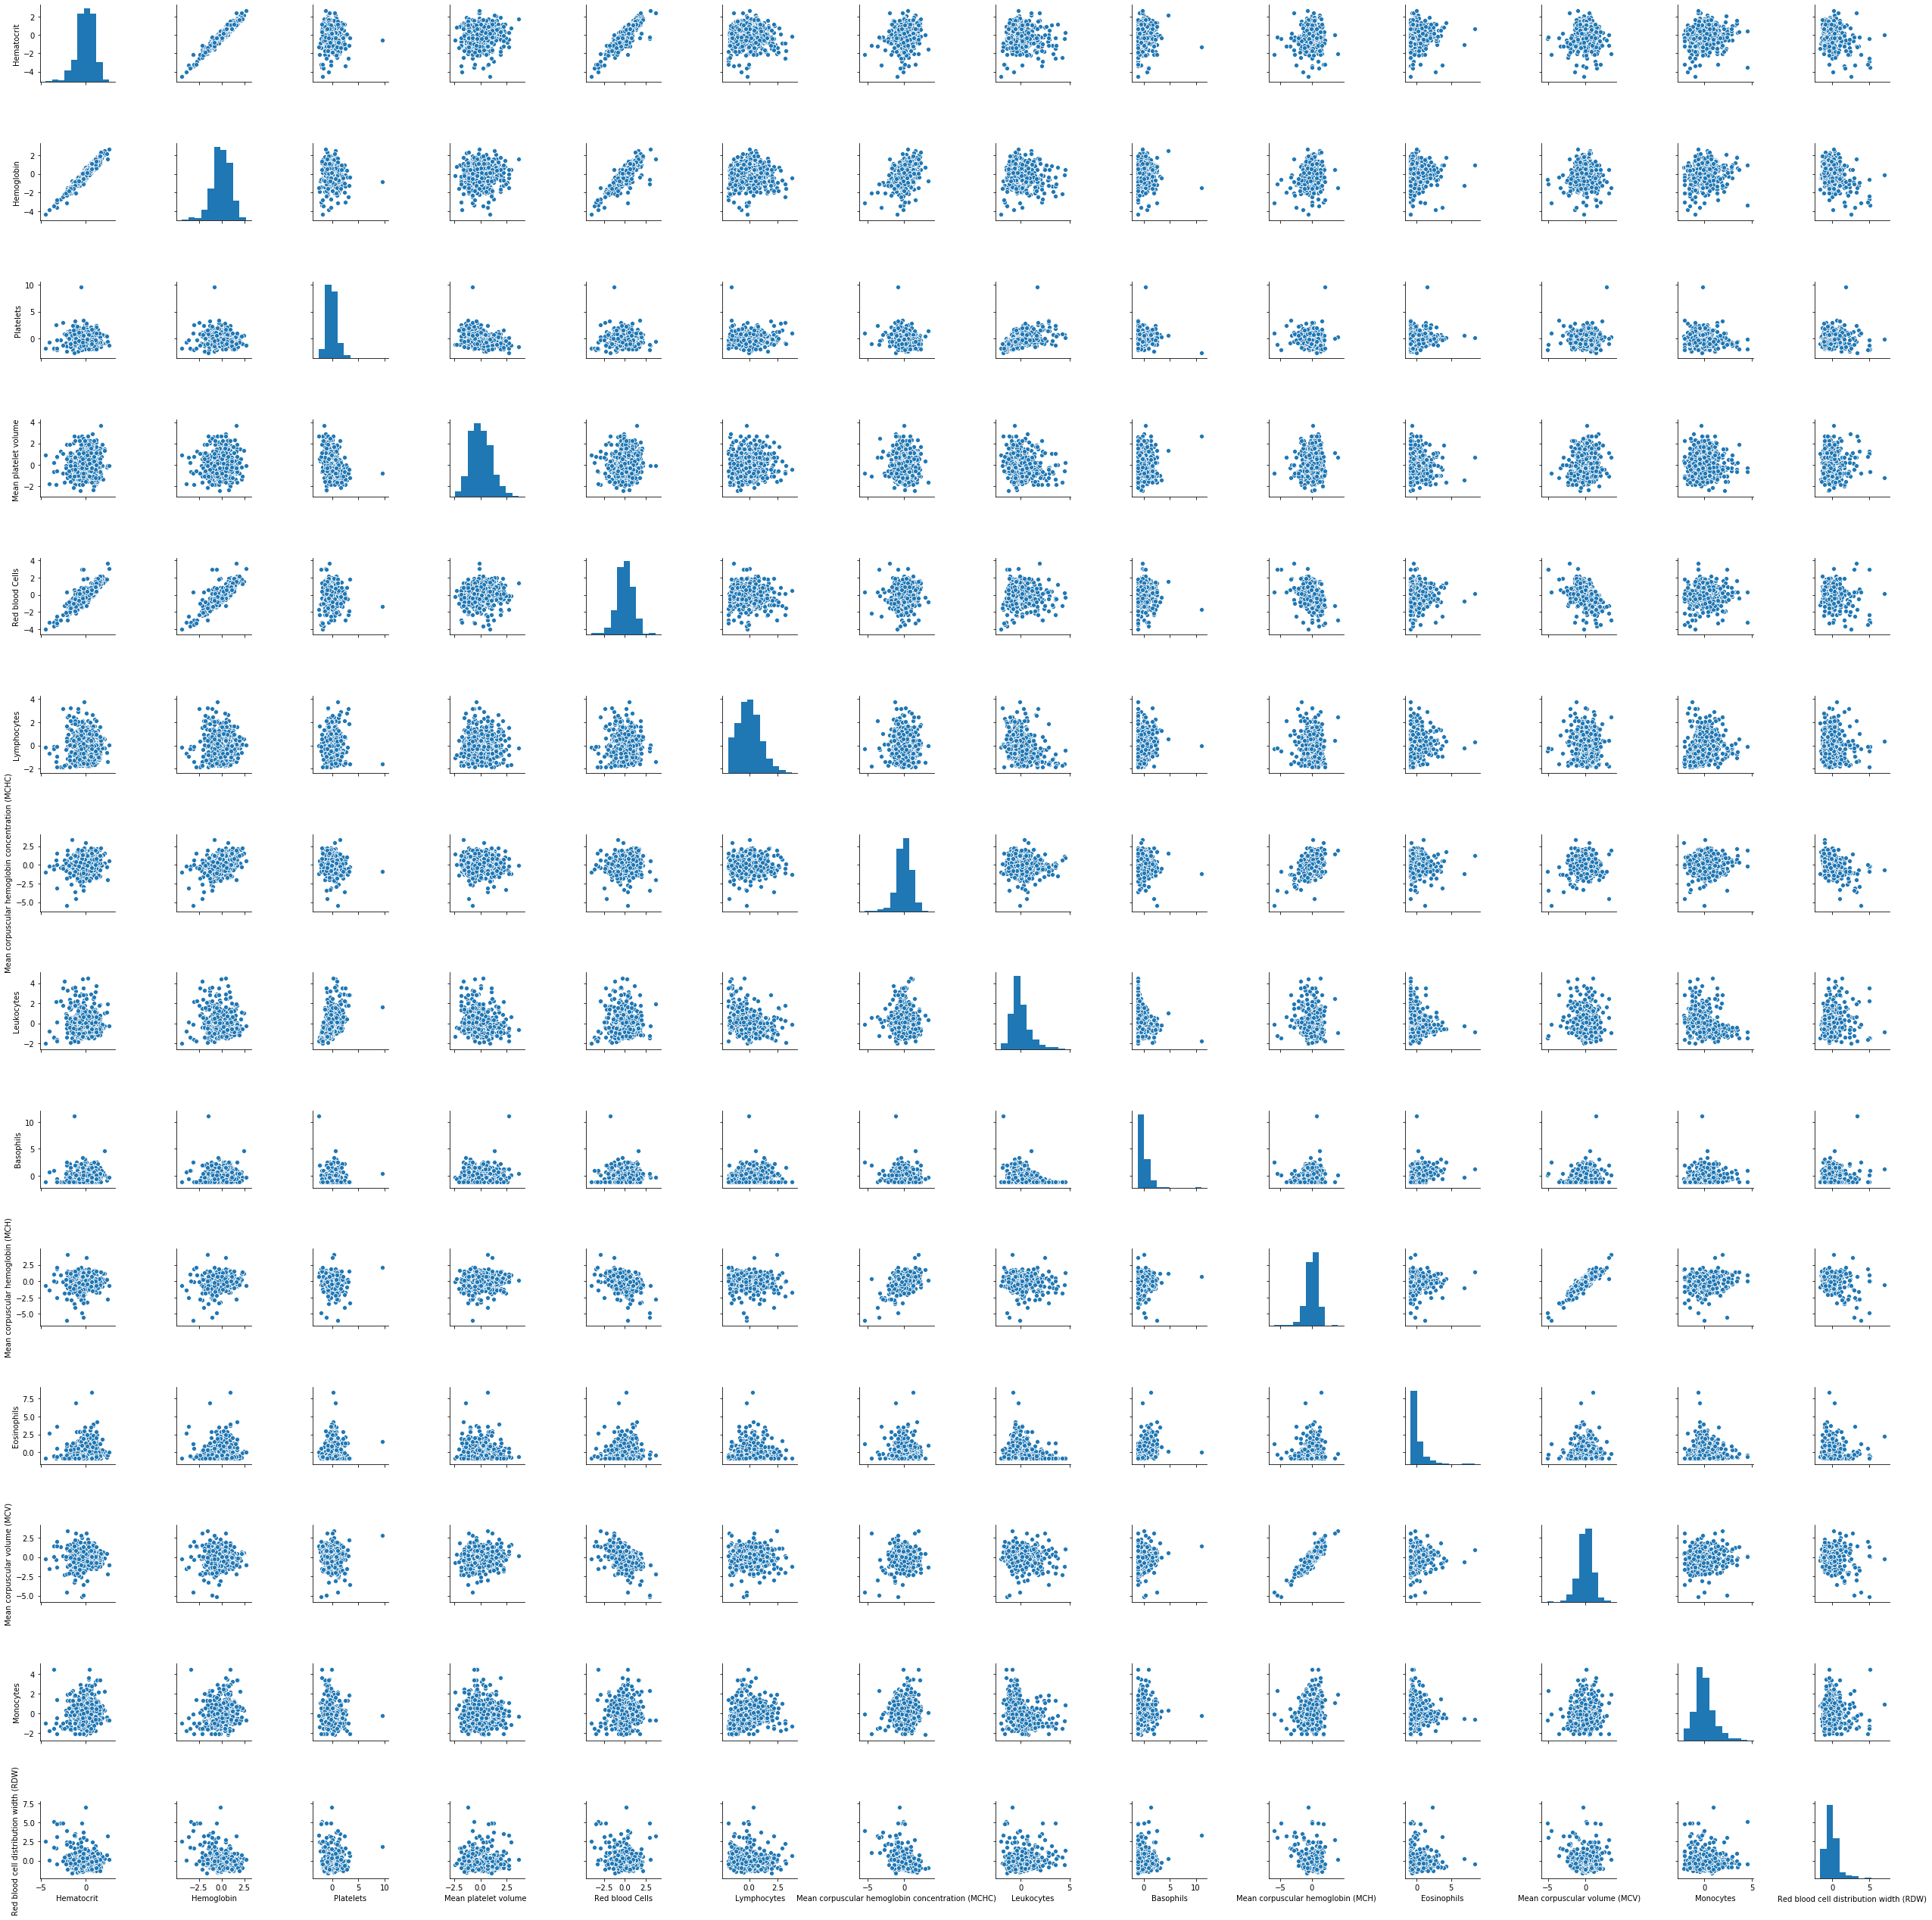

In [16]:
sns.pairplot(df[blood_columns])

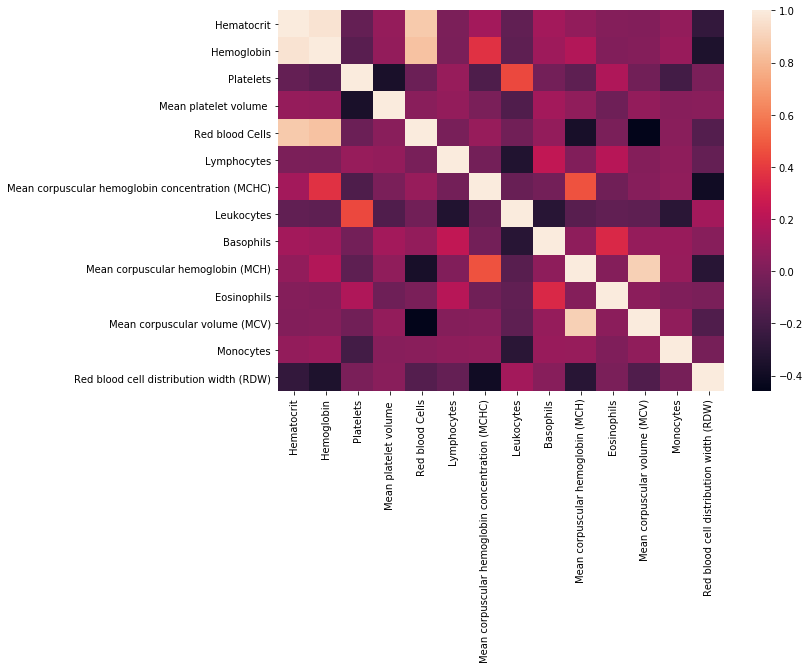

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(df[blood_columns].corr())

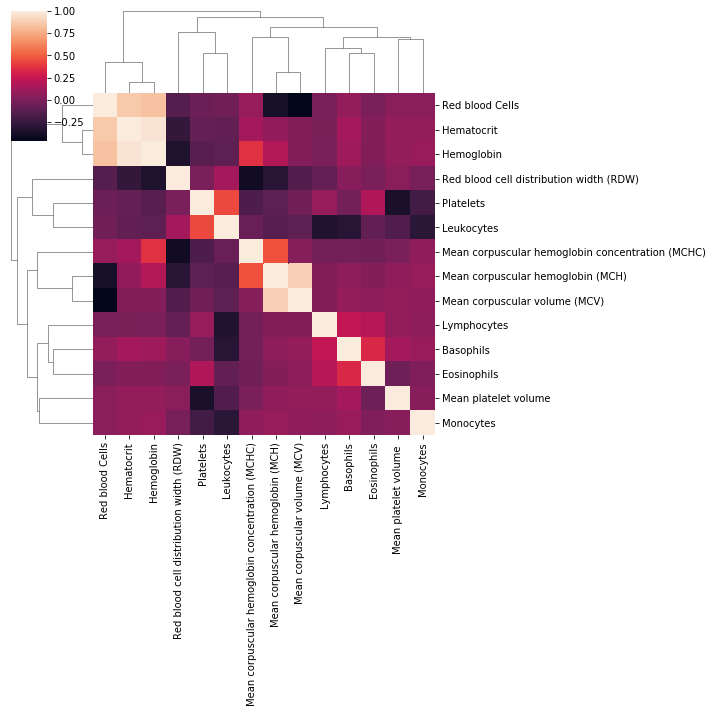

In [23]:
sns.clustermap(df[blood_columns].corr())

/Users/Maxime/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/Maxime/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/Users/Maxime/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed a

<Figure size 432x288 with 0 Axes>

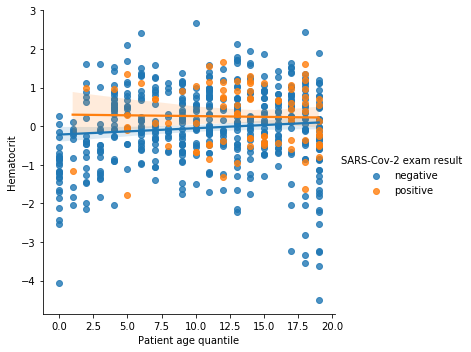

<Figure size 432x288 with 0 Axes>

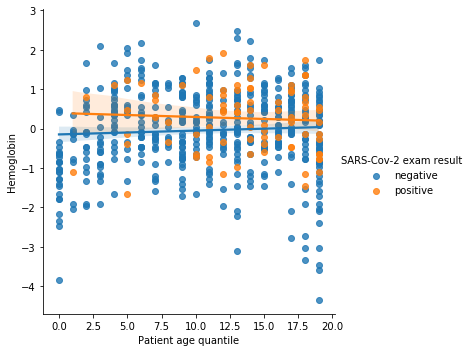

<Figure size 432x288 with 0 Axes>

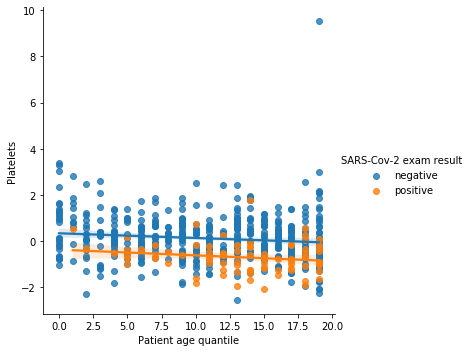

<Figure size 432x288 with 0 Axes>

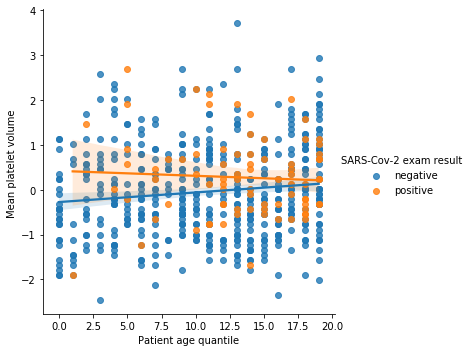

<Figure size 432x288 with 0 Axes>

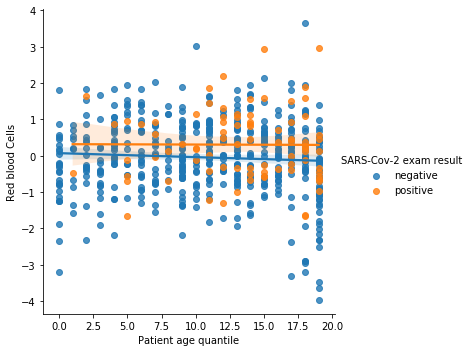

<Figure size 432x288 with 0 Axes>

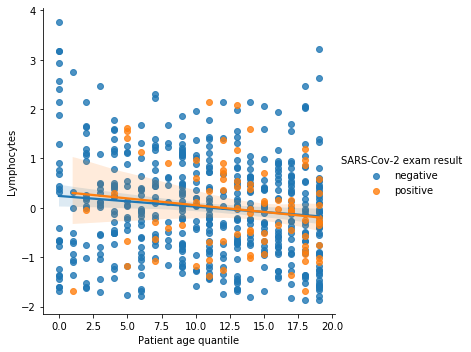

<Figure size 432x288 with 0 Axes>

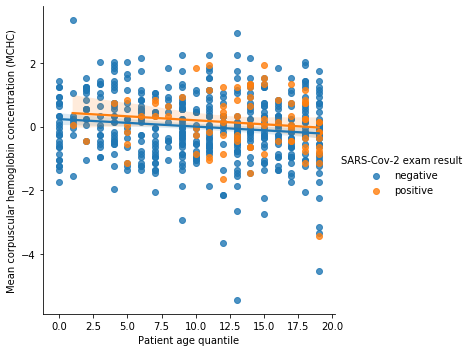

<Figure size 432x288 with 0 Axes>

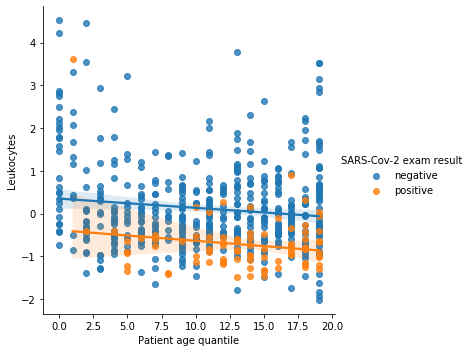

<Figure size 432x288 with 0 Axes>

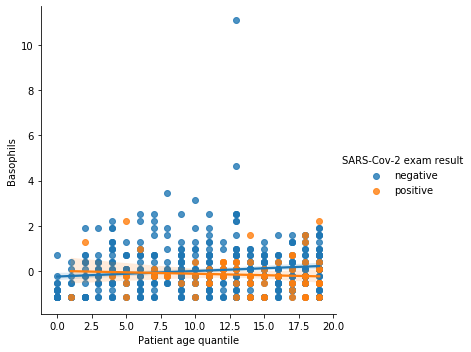

<Figure size 432x288 with 0 Axes>

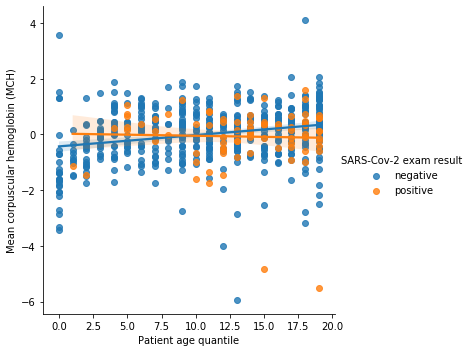

<Figure size 432x288 with 0 Axes>

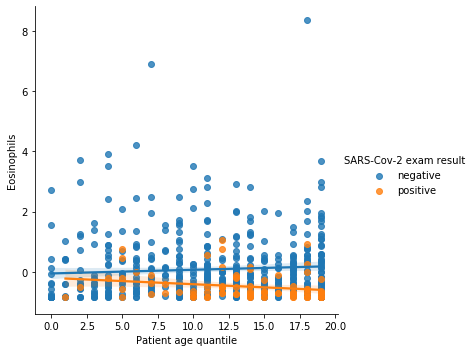

<Figure size 432x288 with 0 Axes>

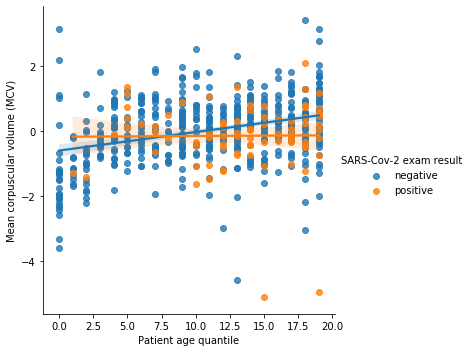

<Figure size 432x288 with 0 Axes>

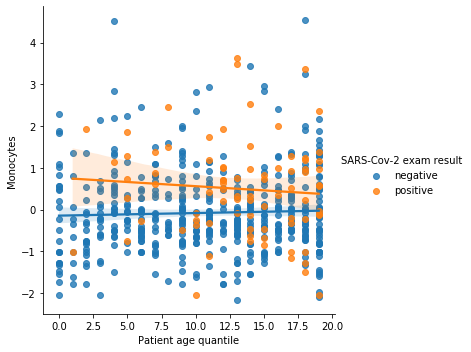

<Figure size 432x288 with 0 Axes>

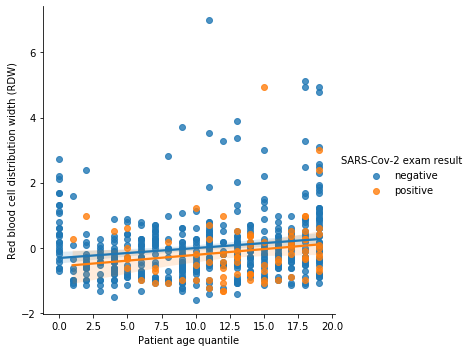

In [24]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)

In [25]:
df.corr()['Patient age quantile'].sort_values() #Corrélation très faible

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

**Création d'une nouvelle variable : est malade**

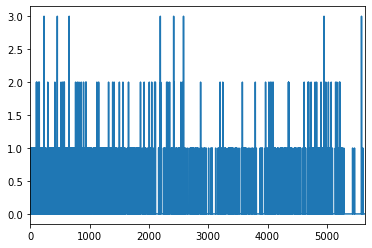

In [32]:
np.sum(df[viral_columns[:-2]] == 'detected', axis=1).plot() #jusqu'à 3 test positifs chez certaines personnes

In [10]:
df['est malade'] = np.sum(df[viral_columns[:-2]] == 'detected', axis=1) >=1

/Users/Maxime/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [11]:
malade_df = df[df['est malade']==True]
non_malade_df = df[df['est malade']==False]

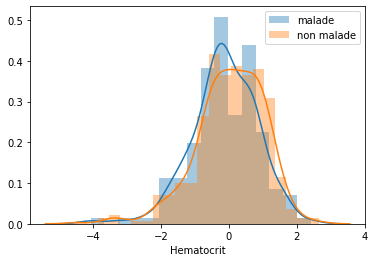

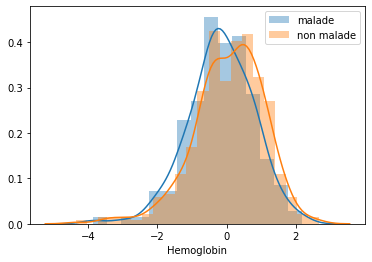

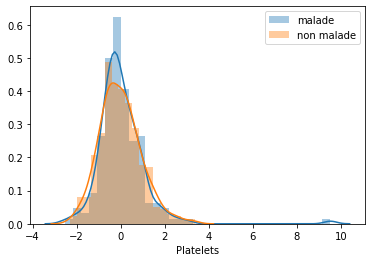

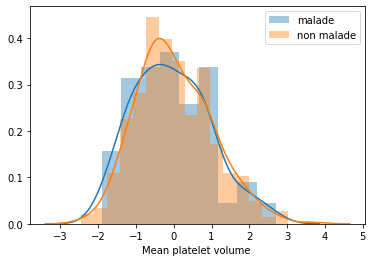

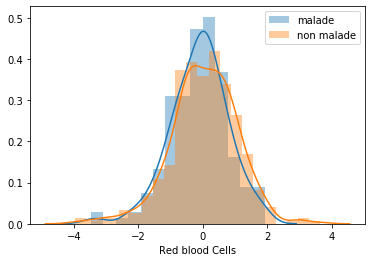

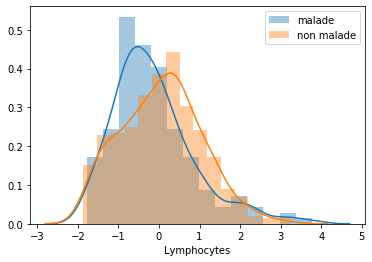

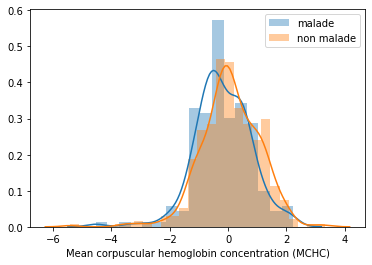

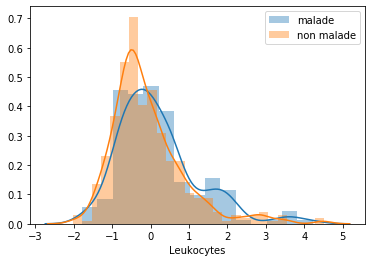

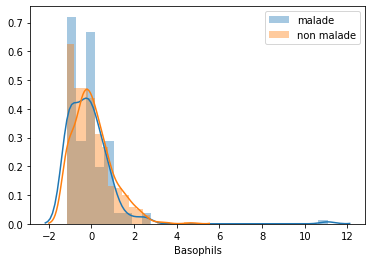

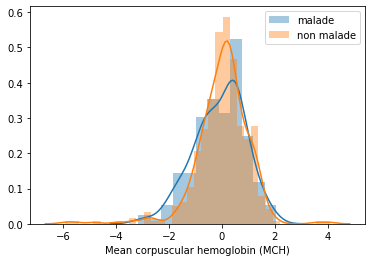

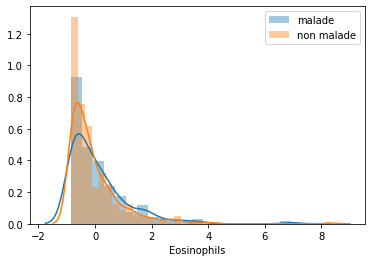

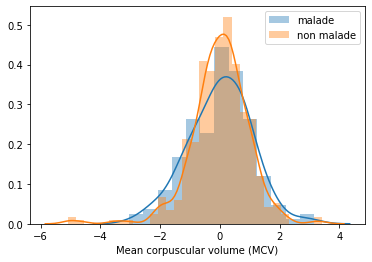

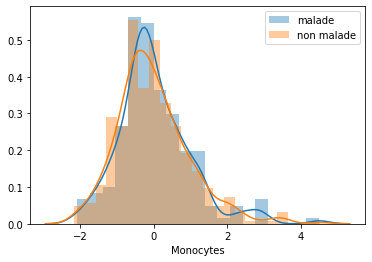

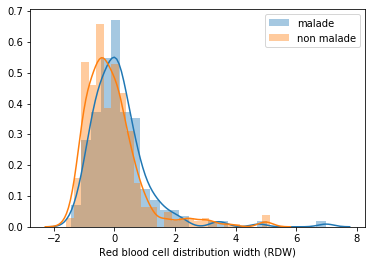

In [37]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col], label='malade')
    sns.distplot(non_malade_df[col], label='non malade')
    plt.legend()

**Hospitalisation**

In [12]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)']==1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1:
        return 'soins semi-intensifs'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)']==1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [13]:
df['statut'] = df.apply(hospitalisation, axis=1)

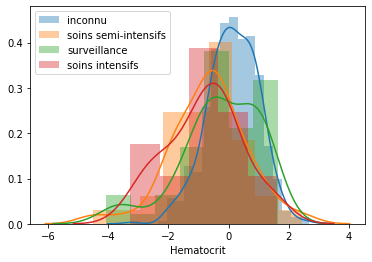

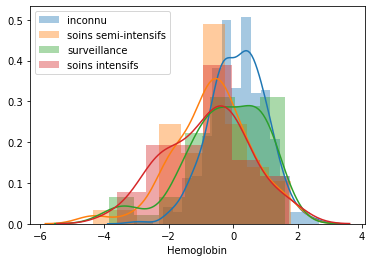

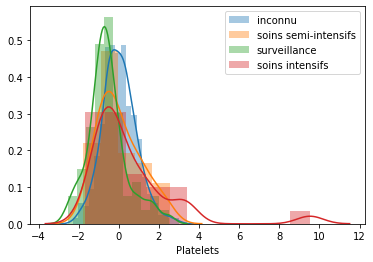

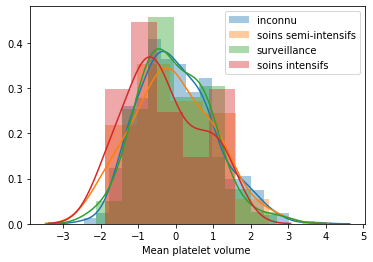

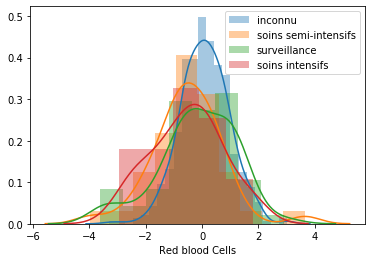

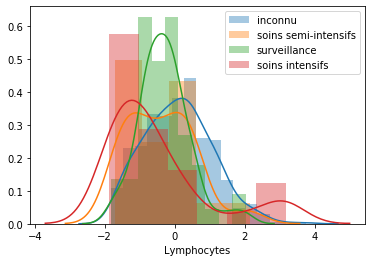

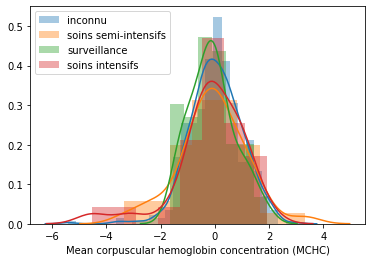

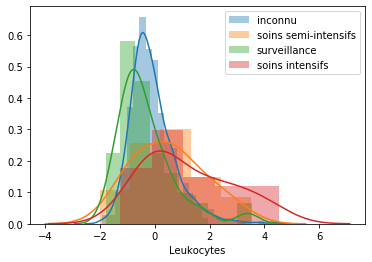

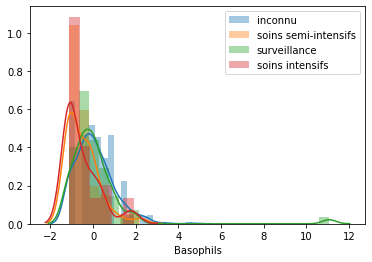

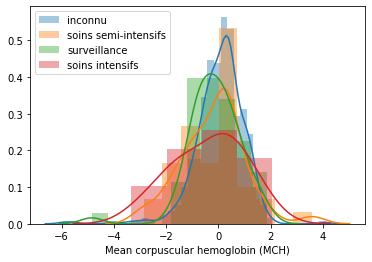

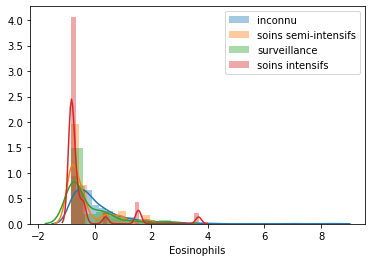

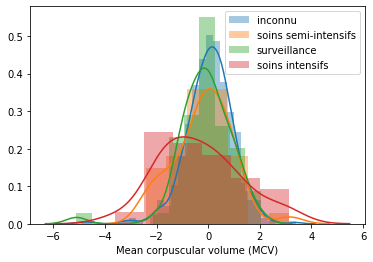

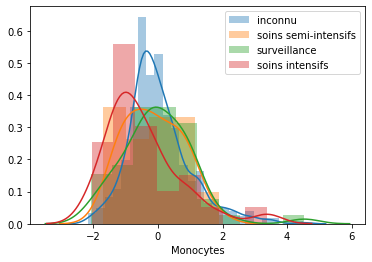

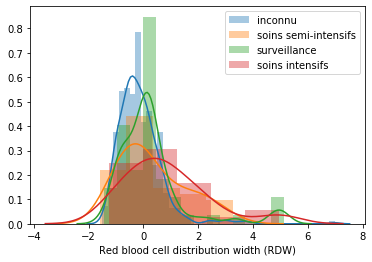

In [14]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col], label=cat)
    plt.legend()

**Analyses de NaN**

In [15]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [16]:
df[viral_columns].count()

SARS-Cov-2 exam result                                   5644
Patient addmited to regular ward (1=yes, 0=no)           5644
Patient addmited to semi-intensive unit (1=yes, 0=no)    5644
Patient addmited to intensive care unit (1=yes, 0=no)    5644
Respiratory Syncytial Virus                              1354
Influenza A                                              1354
Influenza B                                              1354
Parainfluenza 1                                          1352
CoronavirusNL63                                          1352
Rhinovirus/Enterovirus                                   1352
Coronavirus HKU1                                         1352
Parainfluenza 3                                          1352
Chlamydophila pneumoniae                                 1352
Adenovirus                                               1352
Parainfluenza 4                                          1352
Coronavirus229E                                          1352
Coronavi

On cherche ici à savoir si en éliminant certaines variables de notre dataset, nous garderions le même rapport de cas positifs et négatifs. 

In [17]:
df1 = df[viral_columns[:-2]]
df1['covid'] =df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True) #92%/8%

/Users/Maxime/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [18]:
df2 = df[blood_columns]
df2['covid'] =df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True) #86%/14%

/Users/Maxime/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


negative    0.864548
positive    0.135452
Name: covid, dtype: float64

# T-Test

In [19]:
from scipy.stats import ttest_ind #pour les T-test on doit avoir des résultats balancées de la même manière
#ie, autant de variables dans les deux ensembles
#ici il y a bien plus de négatifs:
print(positive_df.shape)
print(negative_df.shape)

(558, 38)
(5086, 38)


In [20]:
#Donc on tire au sort:
negative_df.sample(positive_df.shape[0])

Patient age quantile SARS-Cov-2 exam result  \
653                      0               negative   
2337                    19               negative   
3202                     4               negative   
88                      10               negative   
2544                    12               negative   
...                    ...                    ...   
1472                    19               negative   
2295                     1               negative   
739                     17               negative   
4127                     6               negative   
4692                     1               negative   

      Patient addmited to regular ward (1=yes, 0=no)  \
653                                                0   
2337                                               0   
3202                                               0   
88                                                 0   
2544                                               0   
...                                              ...   
1472                                               0   
2295                                               0   
739                                                0   
4127                                               0   
4692                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
653                                                   0       
2337                                                  0       
3202                                                  0       
88                                                    0       
2544                                                  0       
...                                                 ...       
1472                                                  0       
2295                                                  0       
739                                                   0       
4127                                                  0       
4692                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
653                                                   0             NaN   
2337                                                  0             NaN   
3202                                                  0             NaN   
88                                                    0       -0.541696   
2544                                                  0             NaN   
...                                                 ...             ...   
1472                                                  0             NaN   
2295                                                  0             NaN   
739                                                   0       -2.052342   
4127                                                  0             NaN   
4692                                                  0             NaN   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
653          NaN        NaN                    NaN              NaN   
2337         NaN        NaN                    NaN              NaN   
3202         NaN        NaN                    NaN              NaN   
88     -0.398276  -0.454604              -0.550290        -0.779514   
2544         NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
1472         NaN        NaN                    NaN              NaN   
2295         NaN        NaN                    NaN              NaN   
739    -2.089987   0.462408               0.571643        -2.366246   
4127         NaN        NaN                    NaN              NaN   
4692         NaN        NaN                    NaN              NaN   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
653           NaN                                               NaN   
2337          NaN                          

In [21]:
def t_test(col, alpha):
    balanced_neg = negative_df.sample(positive_df.shape[0])
    stat, p = ttest_ind(balanced_neg[col].dropna(), positive_df[col].dropna())
    if p<alpha:
        return 'H0 rejetée'
    else:
        return 0

In [33]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col, 0.01)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 rejetée
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 rejetée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 rejetée
Red blood cell distribution width (RDW)----------- 0


# Data Preprocessing

Boucle: Idée - Code - Évaluation


* Mettre les données dans un format propice
  * Train / Test
  * Encodage
  * Nettoyage des NaN
  
 --> Créer un modèle de ML et en faire le diagnostique (Underfitting Overfitting...)
 
  
* Améliorer la performance du modèle
  * Feature Selection
  * Feature Engineering
  * Feature Scalling
  * Suppression des Outliers

Pour ce faire on peut:
* Encoder
* Normaliser
* Nettoyer les Outliers
* Feature Extraction
* Feature Selection
* Nettoyage Nan



In [13]:
df_pp = data.copy()

In [14]:
missing_rate = df_pp.isna().sum()/df_pp.shape[0]
blood_columns = list(df_pp.columns[(missing_rate<0.9)&(missing_rate>0.88)]) #on a identifié cela précédemment
viral_columns = list(df_pp.columns[(missing_rate<0.80)& (missing_rate>0.75)]) #les autres
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result' ]

In [15]:
#df_pp=df_pp[blood_columns+key_columns]#+viral_columns]
df_pp=df_pp[blood_columns+key_columns+viral_columns]

In [16]:
df_pp.head(5)

Hematocrit  Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0         NaN         NaN        NaN                    NaN              NaN   
1    0.236515    -0.02234  -0.517413               0.010677         0.102004   
2         NaN         NaN        NaN                    NaN              NaN   
3         NaN         NaN        NaN                    NaN              NaN   
4         NaN         NaN        NaN                    NaN              NaN   

   Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  \
0          NaN                                               NaN         NaN   
1     0.318366                                          -0.95079    -0.09461   
2          NaN                                               NaN         NaN   
3          NaN                                               NaN         NaN   
4          NaN                                               NaN         NaN   

   Basophils  Mean corpuscular hemoglobin (MCH)  ...  Parainfluenza 3  \
0        NaN                                NaN  ...              NaN   
1  -0.223767                          -0.292269  ...     not_detected   
2        NaN                                NaN  ...              NaN   
3        NaN                                NaN  ...              NaN   
4        NaN                                NaN  ...     not_detected   

   Chlamydophila pneumoniae    Adenovirus  Parainfluenza 4  Coronavirus229E  \
0                       NaN           NaN              NaN              NaN   
1              not_detected  not_detected     not_detected     not_detected   
2                       NaN           NaN              NaN              NaN   
3                       NaN           NaN              NaN              NaN   
4              not_detected  not_detected     not_detected     not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   
2             NaN             NaN                  NaN             NaN   
3             NaN             NaN                  NaN             NaN   
4    not_detected    not_detected         not_detected    not_detected   

  Parainfluenza 2  
0             NaN  
1    not_detected  
2             NaN  
3             NaN  
4    not_detected  

[5 rows x 33 columns]

**Train Test - Nettoyage - Encodage**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
trainset, testset = train_test_split(df_pp, test_size=0.2, random_state=0)

In [19]:
trainset['SARS-Cov-2 exam result'].value_counts()
#trainset['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [20]:
testset['SARS-Cov-2 exam result'].value_counts()
#testset['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

**Encodage des variables qualitatives**

In [21]:
def encodage(df):
    code = {'positive':1,
           'negative':0,
           'detected':1,
           'not_detected':0}
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
    return df

In [22]:
def feature_engineering(df):
    df['est malade'] = df[viral_columns].sum(axis=1) >= 1
    df=df.drop(viral_columns, axis=1)
    return df

In [23]:
def imputation(df):
    #return df.fillna(-999)
    return df.dropna(axis=0)

In [24]:
def preprocessing(df):
    
    df= encodage(df)
    #print(df.dtypes.value_counts())
    df = feature_engineering(df)
    df=imputation(df)
    
    X= df.drop('SARS-Cov-2 exam result', axis=1)
    y= df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

In [25]:
X_train, y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


/Users/Maxime/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/Maxime/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


/Users/Maxime/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Modélisation**

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [28]:
#model = RandomForestClassifier(random_state=0)
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [29]:
#D'abord, on ne spécifie aucun super paramètre
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [38]:
list_of_models = {'RandomForest':RandomForest, 
                  'AdaBoost': AdaBoost, 
                  'SVM': SVM, 
                  'KNN': KNN}


Modèle: RandomForest

[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111


Modèle: AdaBoost

[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111


Modèle: SVM

[[92  3]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        95
           1       0.67      0.38      0.48        16

    accuracy                           0.88       111
   macro avg   

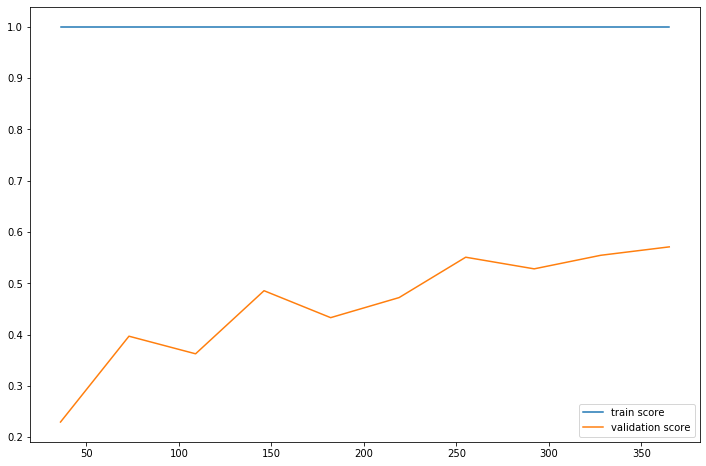

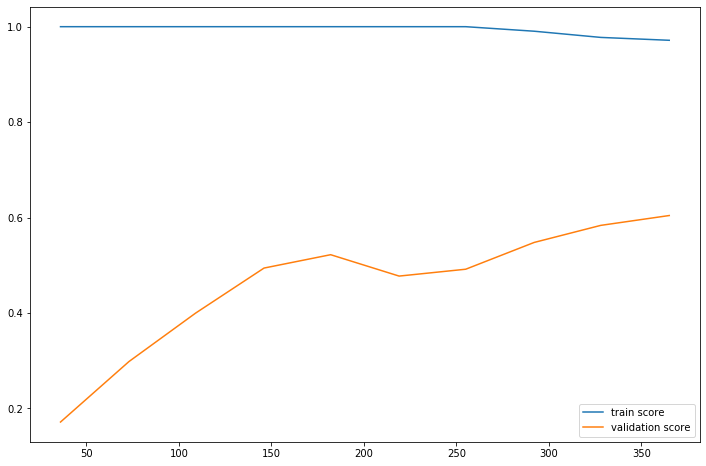

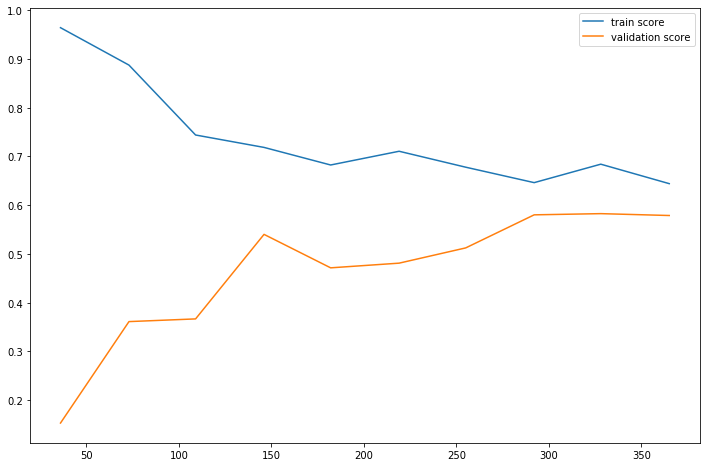

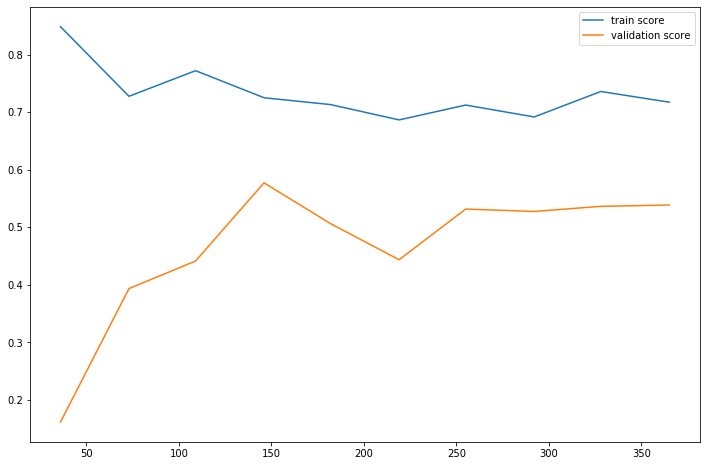

In [41]:
for name, model in list_of_models.items():
    print(f'\nModèle: {name}\n')
    evaluation(model)

**Procédure d'évaluation**

In [31]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [32]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4,
                                               scoring='f1',
                                               train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    

* Sur 54 cas négatifs, on a fait 6 erreurs, et 48 succès d'identification
* sur 12 cas positifs, on a fait 7 erreurs, et 5 succès d'identification
* Recall de 42% (5/12)

[[90  5]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.58      0.44      0.50        16

    accuracy                           0.87       111
   macro avg       0.75      0.69      0.71       111
weighted avg       0.86      0.87      0.87       111



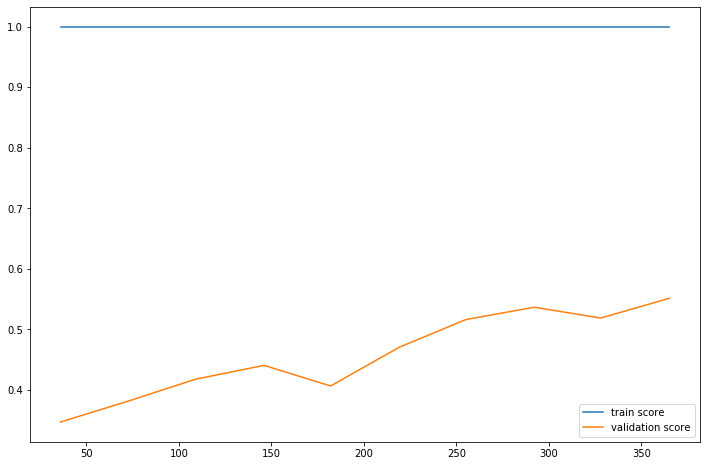

In [335]:
evaluation(model) #On est en OVERFITTING terrible (il est parfait sur le test mais incapable de reproduire 
#le validation set)

## Feature Selection
**Toujours pour lutter contre l'overfitting, on analyse la feature importance**

In [337]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

On peut définir un threshold pour la feature importance. Mais on se rend compte que ce sont les données de type viral qui n'apportent que très peu dans la feature importance.

# Modélisation

* Entrainer une liste de modèles: garder celui qui a la meilleure performance
* Optimiser la performance du modèle grâce à plusieurs GridSearchCV
* Compromis Précision / Recall (courbes - trouver le meilleur Threshold)

**Optimisation**

In [52]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#Randomized cherche de manière aléatoire des valeurs d'hyperparamètres (un gridsearch classique global prendrait un temps fou)

In [44]:
SVM

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=2,
                                                     include_bias=False,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('selectkbest',
                                  SelectKBest(k=10,
                                              score_func=<function f_classif at 0x1a233ded40>))],
                          verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='

In [58]:
hyper_params = {'svc__gamma': [1e-3, 1e-4], #on écrit svc pour l'étpae svc suivie de double underscores
                'svc__C':[1,10,100,1000],
               'pipeline__polynomialfeatures__degree':[2,3,4],
               'pipeline__selectkbest__k':range(40,60)}

In [59]:
#grid = GridSearchCV(SVM, hyper_params, scoring='recall', cv=4) #fonctionne quand on teste peu d'HyperParams
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4, n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred)) #toujours dans cet ordre: test puis pred

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 47, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.58      0.44      0.50        16

    accuracy                           0.87       111
   macro avg       0.75      0.69      0.71       111
weighted avg       0.86      0.87      0.87       111



[[92  3]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        95
           1       0.70      0.44      0.54        16

    accuracy                           0.89       111
   macro avg       0.81      0.70      0.74       111
weighted avg       0.88      0.89      0.88       111



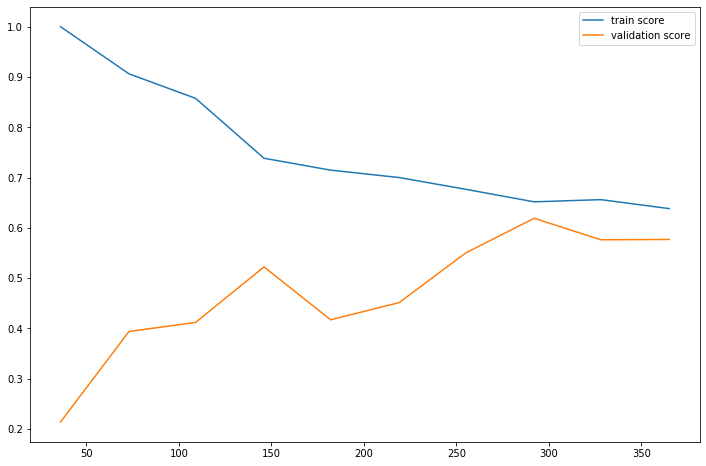

In [49]:
evaluation(grid.best_estimator_)

# Precision Recall Curve

In [60]:
from sklearn.metrics import precision_recall_curve #dans le cas d'une classification binaire
#seuil de décision à partir duquel on va dire qu'une personne est malade
#REMPLACE ICI LE .PREDICT DU MODÈLE

In [61]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

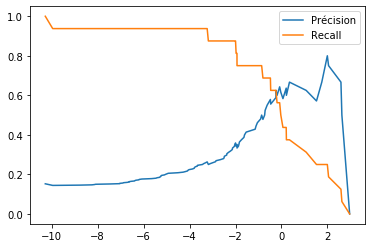

In [63]:
plt.plot(threshold, precision[:-1], label='Précision')#précision jusqu'à l'avant dernier élément
plt.plot(threshold, recall[:-1], label='Recall')#recall jusqu'à l'avant dernier élément
plt.legend()

In [64]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [65]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)

In [67]:
from sklearn.metrics import recall_score

In [68]:
f1_score(y_test, y_pred)

0.5853658536585366

In [69]:
recall_score(y_test, y_pred)

0.75